In [121]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import demoji  # For removing emojis
from langdetect import detect
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import emoji


In [22]:
df = pd.read_csv('Copy of Data Analyst - Test Data - US.csv')

In [23]:
df.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,20/08/2019,Sebastian
1,The rooms were nice the outside needs work als...,20/08/2019,Los Angeles
2,Great location! I have stayed at this hotel on...,20/08/2019,Georgia
3,The hotel was adequate for my stay. The strips...,20/08/2019,NaN
4,"Great location, room was large and spacious. P...",19/08/2019,Palm Harbor


# Data Cleaning

In [24]:
df.isnull().sum()

Review        55
date           0
Location    4737
dtype: int64

In [25]:
#remove NUll Reviews
df = data.dropna(subset = ['Review'] )


In [26]:
df.isnull().sum()

Review         0
date           0
Location    4688
dtype: int64

In [31]:
df.head(100)

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,20/08/2019,Sebastian
1,The rooms were nice the outside needs work als...,20/08/2019,Los Angeles
2,Great location! I have stayed at this hotel on...,20/08/2019,Georgia
3,The hotel was adequate for my stay. The strips...,20/08/2019,NaN
4,"Great location, room was large and spacious. P...",19/08/2019,Palm Harbor
...,...,...,...
96,"Shower appears to have mold on ceiling, wallpa...",10/08/2019,NaN
97,The hotel set as 4.5* yet the service is low 1...,10/08/2019,NaN
98,Simplemente espectacular en todo sentido y mom...,09/08/2019,NaN
99,All good i feel at home on this place even we ...,09/08/2019,NaN


In [32]:
#Remove Read More and Read Less
df['Review'] = df['Review'].str.replace('Read more', '').str.replace('Read less', '')

In [36]:
df['Review'].head(10)

0                                                                                                                                                                                                                                                             I was very impressed with the resort.\n Great staff at the main resort pool bar! We had a blast with them.\n Clean, professional staff, great location and very reasonable!\n  \n  \n  
1                                                                                                                                                                                                                                                                                                                             The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok\n  \n  \n  
2                                                                                                                           

In [38]:
df['Review'] = df['Review'].str.replace('\n', '')

In [39]:
df['Review'].head(10)

0                                                                                                                                                                                                                                                                 I was very impressed with the resort. Great staff at the main resort pool bar! We had a blast with them. Clean, professional staff, great location and very reasonable!      
1                                                                                                                                                                                                                                                                                                                             The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok      
2                                                                                                                                       

In [40]:
df.to_csv('Data_Analysis.csv', index=False)

In [45]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ketankinniwadi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ketankinniwadi/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [61]:
reviews = df['Review']
# Initialize the NLTK stemmer and get a list of stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Remove punctuation, emojis, and non-English reviews
def preprocess_review(review):
    # Remove emojis
    review = demoji.replace(review, '')

    # Detect the language of the review and only process English reviews
    try:
        if detect(review) != 'en':
            return None
    except:
        pass

    # Remove punctuation and convert to lowercase
    review = review.translate(str.maketrans('', '', string.punctuation)).lower()

    # Tokenize the review (split it into words)
    tokens = nltk.word_tokenize(review)

    # Remove stopwords and apply stemming
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]

    # Join the cleaned tokens back into a single string
    cleaned_review = ' '.join(cleaned_tokens)

    return cleaned_review

# Apply the preprocessing function to all reviews in the DataFrame
df['cleaned_review'] = reviews.apply(preprocess_review)

# Remove rows with non-English reviews
df.dropna(subset=['cleaned_review'], inplace=True)


In [47]:
df.to_csv('cleaned_reviews.csv', index=False)

In [56]:
df.head()

,Review,date,Location,cleaned_review
0,"I was very impressed with the resort. Great staff at the main resort pool bar! We had a blast with them. Clean, professional staff, great location and very reasonable!",20/08/2019,Sebastian,impress resort great staff main resort pool bar blast clean profession staff great locat reason
1,The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok,20/08/2019,Los Angeles,room nice outsid need work also free breakfast would nice overal ok
2,Great location! I have stayed at this hotel on my last three trips to New York.,20/08/2019,Georgia,great locat stay hotel last three trip new york
3,The hotel was adequate for my stay. The strips in the bathtub were useless as I fell while taking a shower. I asked the front desk staff several times to get a bath mat but they never did. Management was unresponsive to my request which was very poor; someone should have gone to a dollar store and gotten a bath mat. Breakfast was good but it would have been nice to have had yogurt and/or cottage cheese on the buffet.,20/08/2019,NaN,hotel adequ stay strip bathtub useless fell take shower ask front desk staff sever time get bath mat never manag unrespons request poor someon gone dollar store gotten bath mat breakfast good would nice yogurt andor cottag chees buffet
4,"Great location, room was large and spacious. Parking was easy and we appreciated the friendly staff",19/08/2019,Palm Harbor,great locat room larg spaciou park easi appreci friendli staff


In [52]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ketankinniwadi/nltk_data...


True

In [62]:
sia = SentimentIntensityAnalyzer()
def calculate_sentiment(review):
    polarity_scores = sia.polarity_scores(review)
    return polarity_scores['compound']

# Apply the sentiment analysis function to each review and create a new column
df['Sentiment Score'] = df['cleaned_review'].apply(calculate_sentiment)

# Assign sentiment labels based on the compound score
def assign_sentiment_label(compound_score):
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment Label'] = df['Sentiment Score'].apply(assign_sentiment_label)

# Print the DataFrame with sentiment scores and labels
print(df)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Review  \
0                                                                                                                                                                                                                                                                                                                        

In [63]:
df.head()

,Review,date,Location,cleaned_review,Sentiment Score,Sentiment Label
0,"I was very impressed with the resort. Great staff at the main resort pool bar! We had a blast with them. Clean, professional staff, great location and very reasonable!",20/08/2019,Sebastian,impress resort great staff main resort pool bar blast clean profession staff great locat reason,0.9300,Positive
1,The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok,20/08/2019,Los Angeles,room nice outsid need work also free breakfast would nice overal ok,0.8779,Positive
2,Great location! I have stayed at this hotel on my last three trips to New York.,20/08/2019,Georgia,great locat stay hotel last three trip new york,0.6249,Positive
3,The hotel was adequate for my stay. The strips in the bathtub were useless as I fell while taking a shower. I asked the front desk staff several times to get a bath mat but they never did. Management was unresponsive to my request which was very poor; someone should have gone to a dollar store and gotten a bath mat. Breakfast was good but it would have been nice to have had yogurt and/or cottage cheese on the buffet.,20/08/2019,NaN,hotel adequ stay strip bathtub useless fell take shower ask front desk staff sever time get bath mat never manag unrespons request poor someon gone dollar store gotten bath mat breakfast good would nice yogurt andor cottag chees buffet,-0.0516,Negative
4,"Great location, room was large and spacious. Parking was easy and we appreciated the friendly staff",19/08/2019,Palm Harbor,great locat room larg spaciou park easi appreci friendli staff,0.6249,Positive


In [65]:
df.to_csv('final_data.csv',index=False)

In [66]:
df.drop('cleaned_review', axis=1, inplace=True)

In [77]:
df.head()

,Review,date,Location,Sentiment Score,Rating
0,"I was very impressed with the resort. Great staff at the main resort pool bar! We had a blast with them. Clean, professional staff, great location and very reasonable!",20/08/2019,Sebastian,0.9300,Positive
1,The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok,20/08/2019,Los Angeles,0.8779,Positive
2,Great location! I have stayed at this hotel on my last three trips to New York.,20/08/2019,Georgia,0.6249,Positive
3,The hotel was adequate for my stay. The strips in the bathtub were useless as I fell while taking a shower. I asked the front desk staff several times to get a bath mat but they never did. Management was unresponsive to my request which was very poor; someone should have gone to a dollar store and gotten a bath mat. Breakfast was good but it would have been nice to have had yogurt and/or cottage cheese on the buffet.,20/08/2019,NaN,-0.0516,Negative
4,"Great location, room was large and spacious. Parking was easy and we appreciated the friendly staff",19/08/2019,Palm Harbor,0.6249,Positive


In [78]:
df.rename(columns={'Sentiment Label': 'Sentiment'}, inplace=True)


In [79]:
df.head()

,Review,date,Location,Sentiment Score,Sentiment
0,"I was very impressed with the resort. Great staff at the main resort pool bar! We had a blast with them. Clean, professional staff, great location and very reasonable!",20/08/2019,Sebastian,0.9300,Positive
1,The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok,20/08/2019,Los Angeles,0.8779,Positive
2,Great location! I have stayed at this hotel on my last three trips to New York.,20/08/2019,Georgia,0.6249,Positive
3,The hotel was adequate for my stay. The strips in the bathtub were useless as I fell while taking a shower. I asked the front desk staff several times to get a bath mat but they never did. Management was unresponsive to my request which was very poor; someone should have gone to a dollar store and gotten a bath mat. Breakfast was good but it would have been nice to have had yogurt and/or cottage cheese on the buffet.,20/08/2019,NaN,-0.0516,Negative
4,"Great location, room was large and spacious. Parking was easy and we appreciated the friendly staff",19/08/2019,Palm Harbor,0.6249,Positive


# EDA

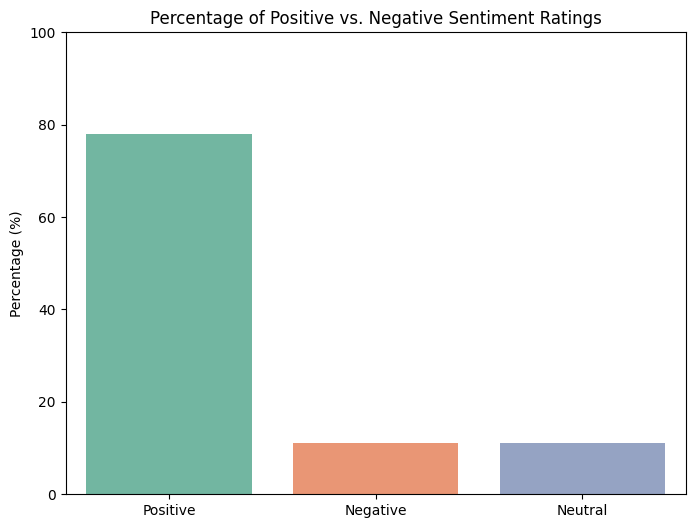

In [82]:
sentiment_counts = df['Sentiment'].value_counts()
total_ratings = sentiment_counts.sum()
percentage_positive = (sentiment_counts['Positive'] / total_ratings) * 100
percentage_negative = (sentiment_counts['Negative'] / total_ratings) * 100
percentage_neutral = (sentiment_counts['Neutral'] / total_ratings) * 100


# Create a bar plot to visualize the percentage of positive and negative sentiment ratings
plt.figure(figsize=(8, 6))
sns.barplot(x=['Positive', 'Negative','Neutral'], y=[percentage_positive, percentage_negative, percentage_neutral], palette='Set2')
plt.title('Percentage of Positive vs. Negative Sentiment Ratings')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set the y-axis limit to 0-100%
plt.show()

Positive Reviews (Approximately 80%): The majority of the reviews in your dataset are positive. This suggests that customers are generally satisfied or have a positive sentiment about the products or services being reviewed.

Negative Reviews (Approximately 10%): A smaller percentage of reviews are negative, indicating that there are some issues or concerns raised by customers. These reviews may provide valuable insights into areas that need improvement.

Neutral Reviews (Approximately 10%): Another small percentage of reviews are neutral, which means they don't strongly express positive or negative sentiment. Neutral reviews might contain factual information or observations without a clear sentiment polarity.

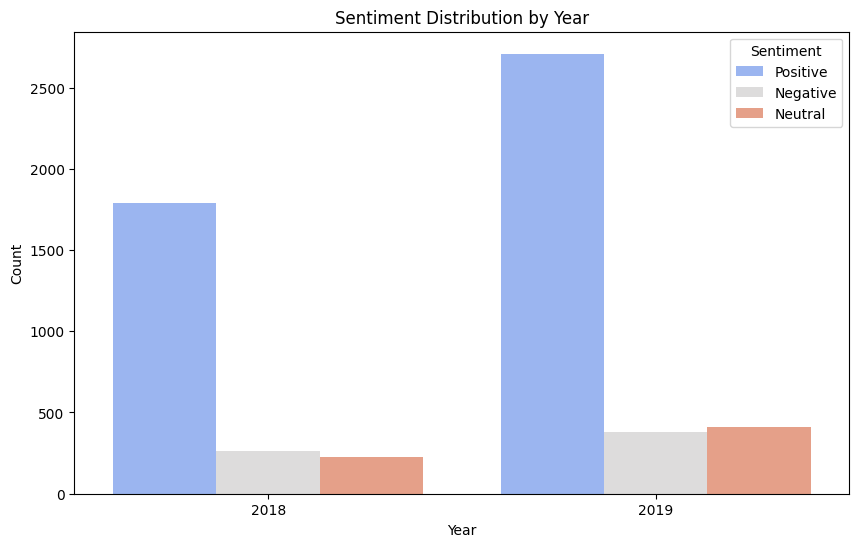

In [88]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', hue='Sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Sentiment', loc='upper right')
plt.show()

Stays Comparison (2018 vs. 2019): The data indicates a substantial increase in the number of hotel stays in the year 2019 compared to 2018. This observation suggests a positive trend in hotel occupancy or demand during that period.

In [91]:
df1 = df.dropna()

In [92]:
df1.head()

,Review,date,Location,Sentiment Score,Sentiment,Year,Month
0,"I was very impressed with the resort. Great staff at the main resort pool bar! We had a blast with them. Clean, professional staff, great location and very reasonable!",2019-08-20,Sebastian,0.9300,Positive,2019,8
1,The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok,2019-08-20,Los Angeles,0.8779,Positive,2019,8
2,Great location! I have stayed at this hotel on my last three trips to New York.,2019-08-20,Georgia,0.6249,Positive,2019,8
4,"Great location, room was large and spacious. Parking was easy and we appreciated the friendly staff",2019-08-19,Palm Harbor,0.6249,Positive,2019,8
10,Very clean and friendly and I love the location The restaurant that is inside was excellent for food and service the bathrooms are a little small because they’re vintage but overall I would definitely stay again,2019-08-19,California,0.8720,Positive,2019,8


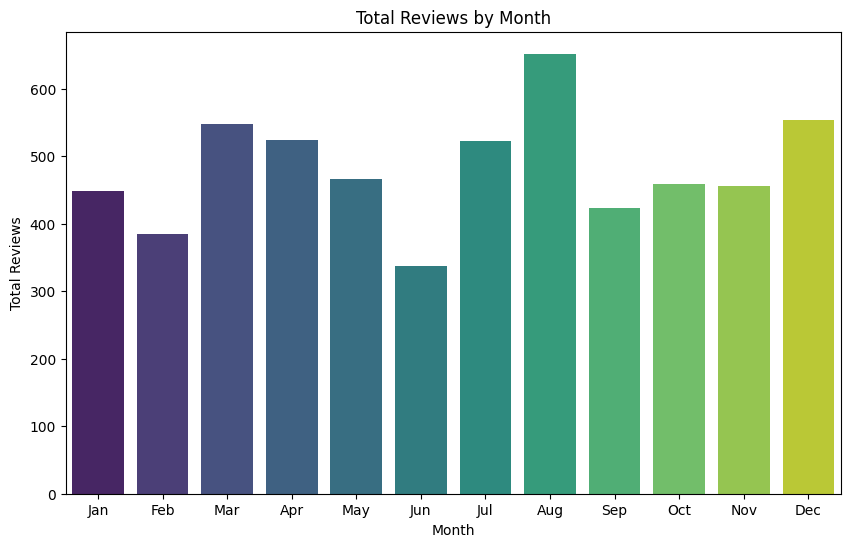

In [101]:
df['Month'] = df['date'].dt.month

# Group the data by month and calculate the total number of reviews for each month
monthly_reviews = df.groupby('Month')['date'].count().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='date', data=monthly_reviews, palette='viridis')
plt.title('Total Reviews by Month')
plt.xlabel('Month')
plt.ylabel('Total Reviews')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


High Number of Reviews in August (Aug) and December (Dec): The analysis reveals that August (Aug) and December (Dec) are the months with the highest number of reviews. The higher number of reviews in these months suggests a significant level of activity or stays during these periods.

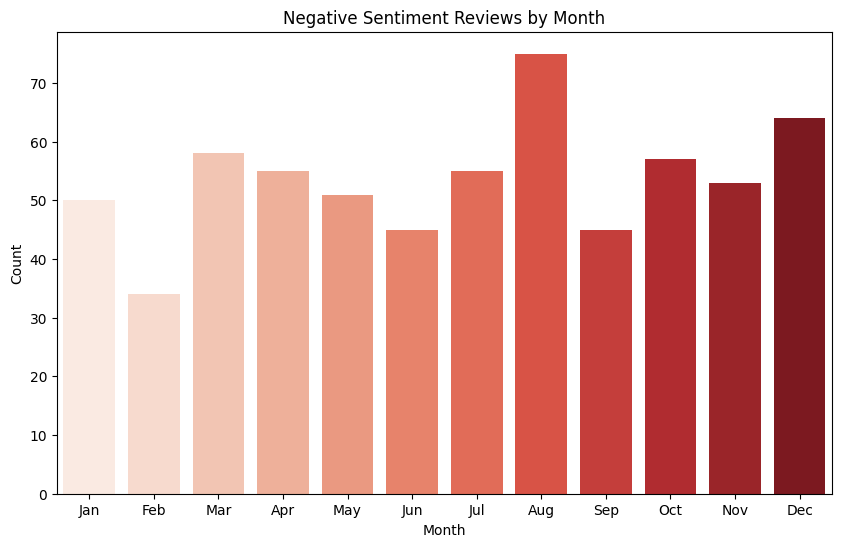

In [100]:
df['Month'] = df['date'].dt.month

# Filter the DataFrame for negative sentiment reviews
negative_reviews = df[df['Sentiment'] == 'Negative']

# Group the negative reviews by month and calculate the count
negative_by_month = negative_reviews.groupby('Month')['Sentiment'].count().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sentiment', data=negative_by_month, palette='Reds')
plt.title('Negative Sentiment Reviews by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Seasonal Factors: Seasonal factors, such as holidays, weather, or special events, may contribute to the higher occurrence of negative reviews during these months. Investigate if any specific events or trends correlate with the negative sentiment.

/var/folders/ng/gk43v8vn0h96mbj67p6xhs0w0000gn/T/ipykernel_27323/341665642.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Location'] = df['Location'].replace(location_replacements)


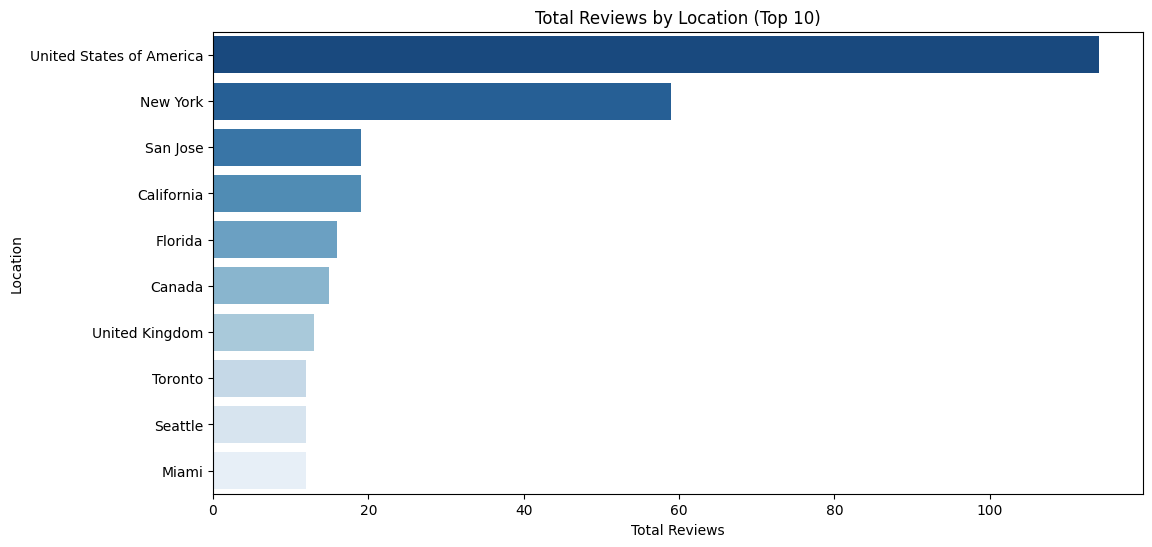

In [106]:
reviews_by_location = df1['Location'].value_counts().reset_index()
reviews_by_location.columns = ['Location', 'Total Reviews']
location_replacements = {
    'ny': 'New York',
    'NY': 'New York',
    'New York, NY': 'New York'
}

# Use the replace method to apply the replacements to the 'Location' column
df1['Location'] = df['Location'].replace(location_replacements)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Reviews', y='Location', data=reviews_by_location.head(10), palette='Blues_r')
plt.title('Total Reviews by Location (Top 10)')
plt.xlabel('Total Reviews')
plt.ylabel('Location')
plt.show()

This indicates that the USA is the primary source of reviews in the dataset, suggesting a significant level of participation from this country's residents or visitors.

In [107]:
df.head()

,Review,date,Location,Sentiment Score,Sentiment,Year,Month
0,"I was very impressed with the resort. Great staff at the main resort pool bar! We had a blast with them. Clean, professional staff, great location and very reasonable!",2019-08-20,Sebastian,0.9300,Positive,2019,8
1,The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok,2019-08-20,Los Angeles,0.8779,Positive,2019,8
2,Great location! I have stayed at this hotel on my last three trips to New York.,2019-08-20,Georgia,0.6249,Positive,2019,8
3,The hotel was adequate for my stay. The strips in the bathtub were useless as I fell while taking a shower. I asked the front desk staff several times to get a bath mat but they never did. Management was unresponsive to my request which was very poor; someone should have gone to a dollar store and gotten a bath mat. Breakfast was good but it would have been nice to have had yogurt and/or cottage cheese on the buffet.,2019-08-20,NaN,-0.0516,Negative,2019,8
4,"Great location, room was large and spacious. Parking was easy and we appreciated the friendly staff",2019-08-19,Palm Harbor,0.6249,Positive,2019,8


In [118]:
data = pd.read_csv('final_data.csv')